In [13]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/Final.xlsx')

print("Before renaming:")
print(df.head())

df = df.rename(columns={'Unnamed: 0': 'Category'})
transposed_df = df.set_index('Category').transpose()

transposed_df = transposed_df.rename(columns={
    '음주운전율': 'DrunkDrivingRate',
    '절도범죄율': 'TheftCrimeRate',
    '폭행율': 'AssaultRate',
    '사기율': 'FraudRate'
})

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Before renaming:
  Unnamed: 0    경기 고양    경기 과천    경기 광명    경기 광주    경기 구리    경기 군포    경기 김포  \
0      음주운전율   34.580   16.746   24.836   46.018   28.770   22.231   26.695   
1      절도범죄율  229.060  253.576  330.672  240.672  254.667  283.726  286.779   
2        폭행율  222.605  113.631  279.581  290.627  226.963  206.860  235.547   
3        사기율  479.605  310.990  520.490  470.269  399.050  454.790  359.013   

    경기 남양주   경기 동두천  ...    경기 안양    경기 양주    경기 여주    경기 용인   경기 의정부  \
0   28.577   34.913  ...   31.665   24.805   56.467   29.761   33.109   
1  191.414  376.407  ...  288.239  147.783  259.578  247.914  263.587   
2  167.285  301.126  ...  213.510  192.152  206.483  174.377  291.996   
3  399.948  649.166  ...  419.783  434.963  622.819  361.587  673.919   

     경기 이천    경기 파주    경기 평택    경기 포천    경기 화성  
0   46.766   32.727   55.817   46.323   32.

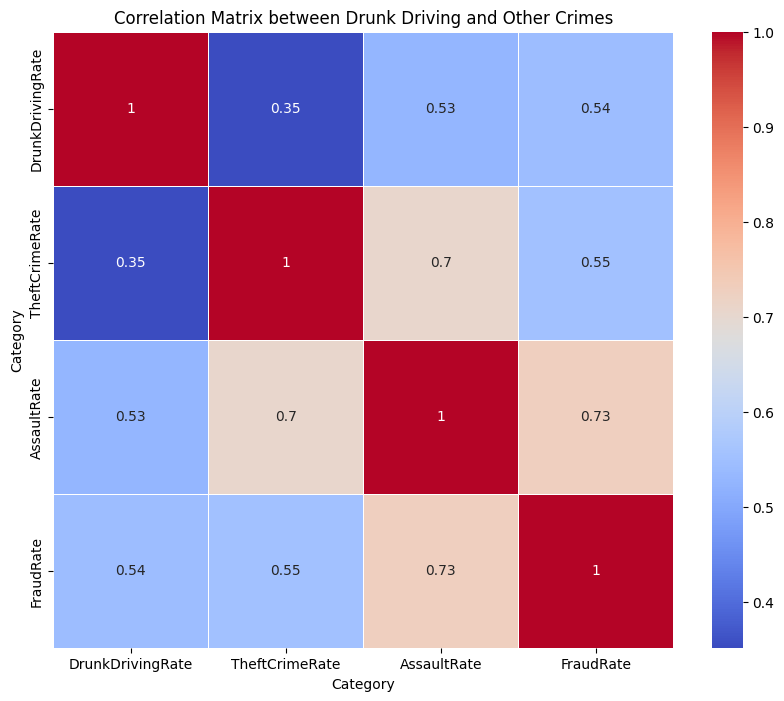

Correlation Matrix:
Category          DrunkDrivingRate  TheftCrimeRate  AssaultRate  FraudRate
Category                                                                  
DrunkDrivingRate          1.000000        0.351881     0.527364   0.541958
TheftCrimeRate            0.351881        1.000000     0.704915   0.553164
AssaultRate               0.527364        0.704915     1.000000   0.727728
FraudRate                 0.541958        0.553164     0.727728   1.000000


In [14]:
correlation_matrix = transposed_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix between Drunk Driving and Other Crimes')
plt.show()

print("Correlation Matrix:")
print(correlation_matrix)

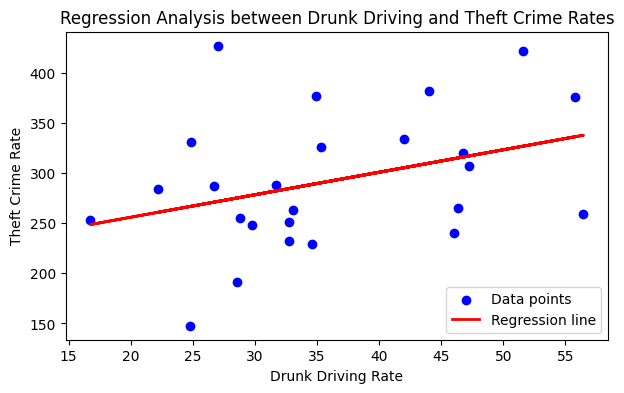

Regression Analysis between Drunk Driving and Theft Crime Rates - Intercept: 211.07155815283284
Regression Analysis between Drunk Driving and Theft Crime Rates - Slope: 2.241256626461506


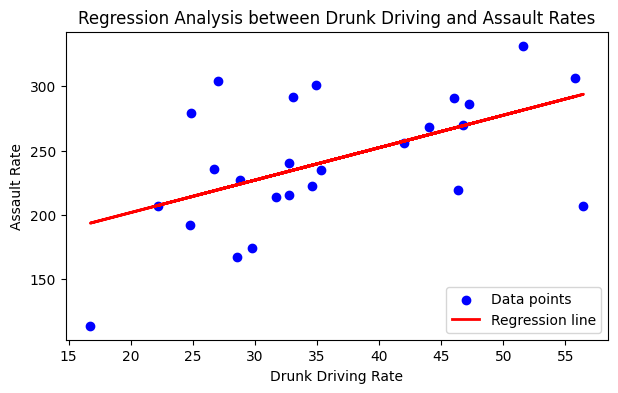

Regression Analysis between Drunk Driving and Assault Rates - Intercept: 151.19759310370688
Regression Analysis between Drunk Driving and Assault Rates - Slope: 2.5262898618319363


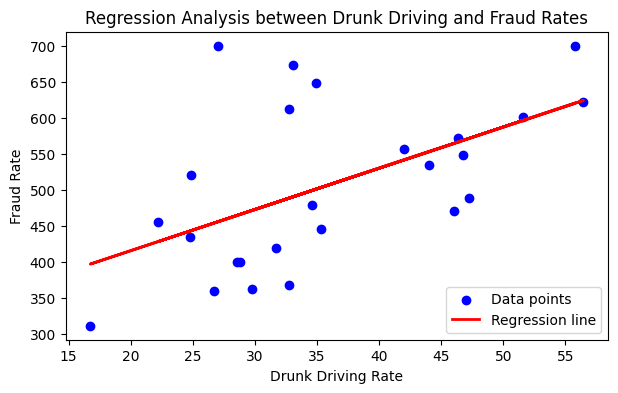

Regression Analysis between Drunk Driving and Fraud Rates - Intercept: 300.7113869778753
Regression Analysis between Drunk Driving and Fraud Rates - Slope: 5.734875474394347


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

transposed_df = df.set_index('Category').transpose()

transposed_df = transposed_df.rename(columns={
    '음주운전율': 'DrunkDrivingRate',
    '절도범죄율': 'TheftCrimeRate',
    '폭행율': 'AssaultRate',
    '사기율': 'FraudRate'
})

def plot_regression(X, y, xlabel, ylabel, title):
    X = X.values.reshape(-1, 1)
    y = y.values

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)

    plt.figure(figsize=(7, 4))
    plt.scatter(X, y, color='blue', label='Data points')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

    print(f'{title} - Intercept: {model.intercept_}')
    print(f'{title} - Slope: {model.coef_[0]}')


plot_regression(transposed_df['DrunkDrivingRate'], transposed_df['TheftCrimeRate'], 'Drunk Driving Rate', 'Theft Crime Rate', 'Regression Analysis between Drunk Driving and Theft Crime Rates')
plot_regression(transposed_df['DrunkDrivingRate'], transposed_df['AssaultRate'], 'Drunk Driving Rate', 'Assault Rate', 'Regression Analysis between Drunk Driving and Assault Rates')
plot_regression(transposed_df['DrunkDrivingRate'], transposed_df['FraudRate'], 'Drunk Driving Rate', 'Fraud Rate', 'Regression Analysis between Drunk Driving and Fraud Rates')
